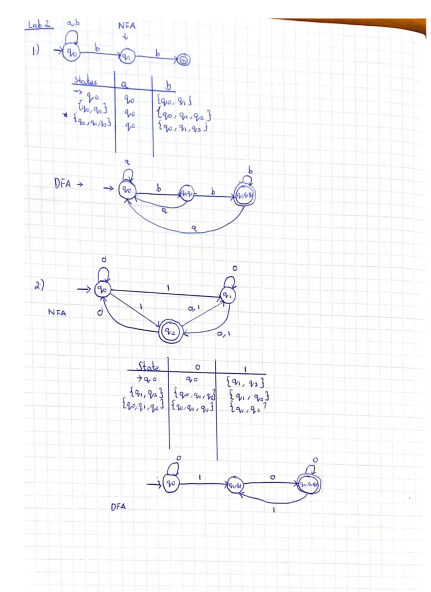

In [ ]:
Flex input file
/* This is the flex files that defines the Non terminal members */
%{
    #include "parser.tab.h"
%}

/*Non terminal members*/
%%

[0-9]+ {yylval.num = atoi(yytext);return NUMBER;}
"+" {return PLUS;}
"-" {return MINUS;}
"*" {return MULTIPLY;}
"/" {return DIVIDE;}
\n {return EOL;}

%%

yywrap() {}


In [ ]:
Bison parser file
/* This is the parser that will result in expressions for the calculator i.e 1 + 2 or 3 / 3 No form of precedence has been coded in this example*/
%{

%}

/*All posible data types*/
%union{
    int num;
}

/*Non terminal*/
%token EOL
%token<num> NUMBER
%token PLUS MINUS MULTIPLY DIVIDE 
%type<num> exp

/*Rules of production*/
%%

input:
| line input 
;

line:  exp EOL {printf("Number : %d\n",$1);}
|       EOL;
exp: 
    NUMBER {$$ = $1;}
|   exp PLUS exp{$$ = $1 + $3;}
|   exp MINUS exp{$$ = $1 - $3;}
|   exp MULTIPLY exp{$$ = $1 * $3;}
|   exp DIVIDE exp{$$ = $1 / $3;}
; 

%%

int main(){
    yyparse();

    return 0;
}

yyerror(char* s){
    printf("ERROR: %s\n",s);

    return 0;
}